# Externalized recordings: load data, visually inspect, preprocessing

In [123]:

import plotly
import plotly.graph_objs as go

# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
from scipy import stats
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz

import seaborn as sns
import pingouin as pg
from itertools import combinations
from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv
import h5py

#mne
from pathlib import Path
import mne_bids
from mne_bids import (
    BIDSPath,
    inspect_dataset,
    mark_channels)
import mne
from mne.time_frequency import tfr_morlet 

#######################     USE THIS DIRECTORY FOR IMPORTING PYPERCEIVE REPO  #######################

# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
BetaSenSightLongterm_path = os.getcwd()
while BetaSenSightLongterm_path[-16:] != 'ResearchProjects':
    BetaSenSightLongterm_path = os.path.dirname(BetaSenSightLongterm_path)

# directory to PyPerceive code folder
PyPerceive_path = os.path.join(BetaSenSightLongterm_path,'PyPerceive_project', 'code', 'PyPerceive', 'code')
sys.path.append(PyPerceive_path)

# # change directory to PyPerceive code path within BetaSenSightLongterm Repo
os.chdir(PyPerceive_path)
os.getcwd()
from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol
import src.bssu.monopolar.monoRef_weightPsdAverageByCoordinateDistance as MonoRefWeightedCoordinateDistance
import src.bssu.monopolar.externalized_lfp as externalized

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF
import src.bssu.utils.load_data_files as load_data

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(MonoRefWeightedCoordinateDistance)
importlib.reload(load_data)
importlib.reload(externalized)
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data


## 5a. Externalized real monopolar recordings: WRITE dataframe

In [ ]:
%matplotlib widget

In [ ]:
patient_metadata = load_data.load_patient_metadata_externalized()

In [24]:
sub_024 = load_data.load_externalized_Poly5_files(sub="24")

In [28]:
sub_024

'/Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data/externalized_lfp/516EA48_MedOff_Rest_StimOff_01__ - 20210614T091828/516EA48_MedOff_Rest_StimOff_01__-20210614T091828.DATA.Poly5'

In [31]:
with h5py.File(sub_024, "r") as poly5_data:
    print("file read")
    # # Extract relevant data from Poly5
    # eeg_data = np.array(poly5_data['EEG']['data'])
    # eeg_info = mne.create_info(ch_names=['EEG'], ch_types='eeg')
    
    # # Create MNE Raw object
    # raw = mne.io.RawArray(eeg_data, eeg_info)
    
    # # Save as FIF
    # fif_file = 'output_file.fif'
    #raw.save(fif_file, overwrite=True)

OSError: Unable to open file (file signature not found)

In [ ]:
sub_025 = load_data.load_BIDS_externalized_vhdr_files(sub="25")
sub_025

Write the files with all externalized recordings: 
- n=16: ["25", "30", "32", "47", "52", "59", 
            "61", "64", "67", "69", "71", 
            "72", "75", "77", "79", "80"]

- missing in BIDS: n=6: ["24", "28", "29", "48", "49", "56"]

In [90]:
processed_LFP = externalized.preprocess_externalized_lfp(
    sub=["25", "30", "32", "47", "52", "59", 
            "61", "64", "67", "69", "71", 
            "72", "75", "77", "79", "80"])

Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L001/ses-LfpMedOff01/ieeg/sub-L001_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L001/ses-LfpMedOff01/ieeg/sub-L001_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L001/ses-LfpMedOff01/ieeg/sub-L001_ses-LfpMedOff01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1216265  =      0.000 ...   304.066 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L001_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L001/**/ieeg/sub-L001_ses-LfpMedOff01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/Bet

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL007/ses-EcogLfpMedOff01/ieeg/sub-EL007_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL007/ses-EcogLfpMedOff01/ieeg/sub-EL007_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL007/ses-EcogLfpMedOff01/ieeg/sub-EL007_ses-EcogLfpMedOff01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1242569  =      0.000 ...   310.642 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-EL007_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL007/**/ieeg/sub-EL007_ses-EcogLfpMedOff01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchP

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L003/ses-LfpMedOff01/ieeg/sub-L003_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L003/ses-LfpMedOff01/ieeg/sub-L003_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L003/ses-LfpMedOff01/ieeg/sub-L003_ses-LfpMedOff01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 735459  =      0.000 ...   183.865 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L003_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L003/**/ieeg/sub-L003_ses-LfpMedOff01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/Bet

Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L007/ses-LfpMedOffDys01/ieeg/sub-L007_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L007/ses-LfpMedOffDys01/ieeg/sub-L007_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L007/ses-LfpMedOffDys01/ieeg/sub-L007_ses-LfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1526563  =      0.000 ...   381.641 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L007_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L007/**/ieeg/sub-L007_ses-LfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/Research

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL014/ses-EcogLfpMedOffDys01/ieeg/sub-EL014_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL014/ses-EcogLfpMedOffDys01/ieeg/sub-EL014_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL014/ses-EcogLfpMedOffDys01/ieeg/sub-EL014_ses-EcogLfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1767569  =      0.000 ...   441.892 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-EL014_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL014/**/ieeg/sub-EL014_ses-EcogLfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/wo

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL016/ses-EcogLfpMedOffDys01/ieeg/sub-EL016_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopaPre_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL016/ses-EcogLfpMedOffDys01/ieeg/sub-EL016_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopaPre_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL016/ses-EcogLfpMedOffDys01/ieeg/sub-EL016_ses-EcogLfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1218773  =      0.000 ...   304.693 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-EL016_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopaPre_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL016/**/ieeg/sub-EL016_ses-EcogLfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/w

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L010/ses-LfpMedOffDys01/ieeg/sub-L010_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L010/ses-LfpMedOffDys01/ieeg/sub-L010_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L010/ses-LfpMedOffDys01/ieeg/sub-L010_ses-LfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1281539  =      0.000 ...   312.876 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L010_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L010/**/ieeg/sub-L010_ses-LfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/Research

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L012/ses-LfpMedOff01/ieeg/sub-L012_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L012/ses-LfpMedOff01/ieeg/sub-L012_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L012/ses-LfpMedOff01/ieeg/sub-L012_ses-LfpMedOff01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 823483  =      0.000 ...   201.046 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L012_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L012/**/ieeg/sub-L012_ses-LfpMedOff01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/Bet

Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL017/ses-EcogLfpMedOffDys01/ieeg/sub-EL017_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL017/ses-EcogLfpMedOffDys01/ieeg/sub-EL017_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL017/ses-EcogLfpMedOffDys01/ieeg/sub-EL017_ses-EcogLfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 923039  =      0.000 ...   225.351 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-EL017_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL017/**/ieeg/sub-EL017_ses-EcogLfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/wo

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L013/ses-LfpMedOffDys01/ieeg/sub-L013_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L013/ses-LfpMedOffDys01/ieeg/sub-L013_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L013/ses-LfpMedOffDys01/ieeg/sub-L013_ses-LfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1483569  =      0.000 ...   370.892 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L013_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L013/**/ieeg/sub-L013_ses-LfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/Research

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L014/ses-LfpMedOff01/ieeg/sub-L014_ses-LfpMedOff01_task-Rest_acq-StimOff_run-2_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L014/ses-LfpMedOff01/ieeg/sub-L014_ses-LfpMedOff01_task-Rest_acq-StimOff_run-2_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L014/ses-LfpMedOff01/ieeg/sub-L014_ses-LfpMedOff01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1225559  =      0.000 ...   306.390 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L014_ses-LfpMedOff01_task-Rest_acq-StimOff_run-2.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L014/**/ieeg/sub-L014_ses-LfpMedOff01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM, REF_COMMONAVG, UNI_33 has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/wo

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L015/ses-LfpMedOffDys01/ieeg/sub-L015_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L015/ses-LfpMedOffDys01/ieeg/sub-L015_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L015/ses-LfpMedOffDys01/ieeg/sub-L015_ses-LfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1072847  =      0.000 ...   268.212 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L015_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L015/**/ieeg/sub-L015_ses-LfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/Research

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL019/ses-EcogLfpMedOffDys01/ieeg/sub-EL019_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL019/ses-EcogLfpMedOffDys01/ieeg/sub-EL019_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL019/ses-EcogLfpMedOffDys01/ieeg/sub-EL019_ses-EcogLfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 1601209  =      0.000 ...   390.920 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-EL019_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL019/**/ieeg/sub-EL019_ses-EcogLfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/wo

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L016/ses-LfpMedOffDys01/ieeg/sub-L016_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L016/ses-LfpMedOffDys01/ieeg/sub-L016_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L016/ses-LfpMedOffDys01/ieeg/sub-L016_ses-LfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 798187  =      0.000 ...   199.547 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L016_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L016/**/ieeg/sub-L016_ses-LfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/Research

Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L017/ses-LfpMedOffDys01/ieeg/sub-L017_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L017/ses-LfpMedOffDys01/ieeg/sub-L017_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L017/ses-LfpMedOffDys01/ieeg/sub-L017_ses-LfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 971539  =      0.000 ...   242.885 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-L017_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-L017/**/ieeg/sub-L017_ses-LfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/Research

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL021/ses-EcogLfpMedOffDys01/ieeg/sub-EL021_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL021/ses-EcogLfpMedOffDys01/ieeg/sub-EL021_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_channels.tsv.
Reading electrode coords from /Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL021/ses-EcogLfpMedOffDys01/ieeg/sub-EL021_ses-EcogLfpMedOffDys01_space-MNI152NLin2009bAsym_electrodes.tsv.
Reading 0 ... 892184  =      0.000 ...   223.046 secs...


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: Did not find any events.tsv associated with sub-EL021_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1.

The search_str was "/Users/jenniferbehnke/OneDrive - Charité - Universitätsmedizin Berlin/BIDS_01_Berlin_Neurophys/rawdata/sub-EL021/**/ieeg/sub-EL021_ses-EcogLfpMedOffDys01*events.tsv"
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/utils/load_data_files.py:230: RuntimeWarning: The unit for channel(s) ACC_L_X_D2_TM, ACC_L_Y_D2_TM, ACC_L_Z_D2_TM, ACC_R_X_D2_TM, ACC_R_Y_D2_TM, ACC_R_Z_D2_TM has changed from V to NA.
  data = mne_bids.read_raw_bids(bids_path=bids_path) # datatype: mne.io.brainvision.brainvision.RawBrainVision
/Users/jenniferbehnke/Dropbox/wo

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
externalized_preprocessed_data.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results
externalized_recording_info_original.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results
mne_objects_cropped_2_min.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results


In [ ]:
group_data = processed_LFP["group_data"]
sub_025_1A = group_data.original_lfp.values[1]
sub_025_time = group_data.original_time_stamps[1]

sub025_original_2min = processed_LFP["mne_objects"]["25_original_2min"]
sub025_resampled_2min = processed_LFP["mne_objects"]["25_resampled_2min"]
sub025_resampled_2min.compute_psd(method="welch").plot()

In [ ]:

band_pass_filtered = data.filter(l_freq=5.0, h_freq=95.0)
# band pass and notch filter
filter_params = mne.filter.create_filter(
    data.get_data(), data.info["sfreq"], l_freq=5.0, h_freq=95.0
)
data.plot(highpass=5.0, lowpass=95.0, filtorder=5.0)

In [ ]:
# downsample to Percept sfreq
resampled = data.copy().resample(sfreq=250.0)
resampled.compute_psd(tmax=np.inf, fmax=125).plot(average=True, exclude="bads")
fig = data.compute_psd(tmax=np.inf, fmax=100).plot(average=True, exclude="bads")

In [ ]:
# butterworth filter: band pass -> filter order = 5, high pass 5 Hz, low-pass 95 Hz
# nodge filter: 48-52 Hz

# detect artefacts 
# remove artefacts (cut out)


## 5b. Externalized recordings: Load and plot 

load recording Info

In [284]:
rec_info = load_data.load_externalized_pickle(filename="externalized_recording_info_original")
rec_info

,subject,BIDS_id,ch_names,bads,sfreq,subject_info,number_time_stamps,recording_duration
original_information,025,sub-L001,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-L001', 'sex': 1, 'handedness':...",1216266,5.067775
original_information,030,sub-EL007,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-EL007', 'sex': 1, 'handedness'...",1242570,5.177375
original_information,032,sub-L003,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_08_STN_MT],4000.0,"{'his_id': 'sub-L003', 'sex': 1, 'handedness':...",735460,3.064417
original_information,047,sub-L007,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-L007', 'sex': 2, 'handedness':...",1526564,6.360683
original_information,052,sub-EL014,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...","[LFP_R_07_STN_MT, LFP_L_01_STN_MT]",4000.0,"{'his_id': 'sub-EL014', 'sex': 1, 'handedness'...",1767570,7.364875
original_information,059,sub-EL016,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...","[LFP_L_01_STN_MT, ECOG_R_01_SMC_AT, ECOG_R_03_...",4000.0,"{'his_id': 'sub-EL016', 'sex': 1, 'handedness'...",1218774,5.078225
original_information,061,sub-L010,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4096.0,"{'his_id': 'sub-L010', 'sex': 1, 'handedness':...",1281540,5.2146
original_information,064,sub-L012,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_R_01_STN_MT],4096.0,"{'his_id': 'sub-L012', 'sex': 1, 'handedness':...",823484,3.350765
original_information,067,sub-EL017,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4096.0,"{'his_id': 'sub-EL017', 'sex': 2, 'handedness'...",923040,3.755859
original_information,069,sub-L013,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-L013', 'sex': 2, 'handedness':...",1483570,6.181542


Load preprocessed data in a dataframe

In [91]:
preprocessed_data = load_data.load_externalized_pickle(filename="externalized_preprocessed_data")
preprocessed_data.head()

,BIDS_id,subject,hemisphere,subject_hemisphere,original_ch_name,contact,lfp_2_min,time_stamps,sfreq,sfreq_250Hz,lfp_resampled_250Hz,time_stamps_250Hz,filtered_lfp_4000Hz,filtered_lfp_250Hz,n_samples_250Hz
LFP_R_01_STN_MT,L001,025,Right,025_Right,LFP_R_01_STN_MT,0,"[0.004980505859375, 0.00499101611328125, 0.004...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.004981967630519316, 0.004993935731201689, 0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[-2.9618872254968376e-07, 7.872333751786832e-0...","[-7.59355112107618e-07, 9.768670360289528e-06,...",30000
LFP_R_02_STN_MT,L001,025,Right,025_Right,LFP_R_02_STN_MT,1A,"[0.04113792578125, 0.041147203125, 0.041153710...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.04113918003087577, 0.04115062690047614, 0.0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[-2.19025538731663e-06, -1.2608526729521691e-0...","[-5.4162502175678e-07, 8.516945973380159e-06, ...",30000
LFP_R_03_STN_MT,L001,025,Right,025_Right,LFP_R_03_STN_MT,1B,"[0.03457408203125, 0.034582628906249996, 0.034...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.03457557399192996, 0.03458711967239609, 0.0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[-7.314212306736417e-07, 3.055000770862241e-07...","[-7.327385311077718e-07, 8.641706900393375e-06...",30000
LFP_R_04_STN_MT,L001,025,Right,025_Right,LFP_R_04_STN_MT,1C,"[0.036031136718749995, 0.03603557421875, 0.036...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.036032965327211765, 0.03604643947045076, 0....","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[1.702683748518506e-07, 1.3902650470003246e-06...","[-6.7949441232911e-07, 1.0517844753306478e-05,...",30000
LFP_R_05_STN_MT,L001,025,Right,025_Right,LFP_R_05_STN_MT,2A,"[0.1043965625, 0.1044021015625, 0.104413085937...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.10439865455493076, 0.10441350059516627, 0.1...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[1.8502642472384863e-06, 3.191096217257872e-06...","[-5.950167616677922e-07, 1.1721655059859144e-0...",30000


In [95]:
row_index = preprocessed_data[(preprocessed_data["BIDS_id"]=="L001") & (preprocessed_data["hemisphere"]=="Right") & (preprocessed_data["contact"]=="1A")].index
row_index = row_index[0]

In [96]:
row_index

'LFP_R_02_STN_MT'

In [10]:
sfreq_250 = preprocessed_data.sfreq_250Hz.values[1]
data_250 = preprocessed_data.filtered_lfp_250Hz.values[1]

sfreq_4000 = preprocessed_data.sfreq.values[1]
data_4000 = preprocessed_data.filtered_lfp_4000Hz.values[1]

### Compare LFP sfreq 4000 Hz to 250 Hz

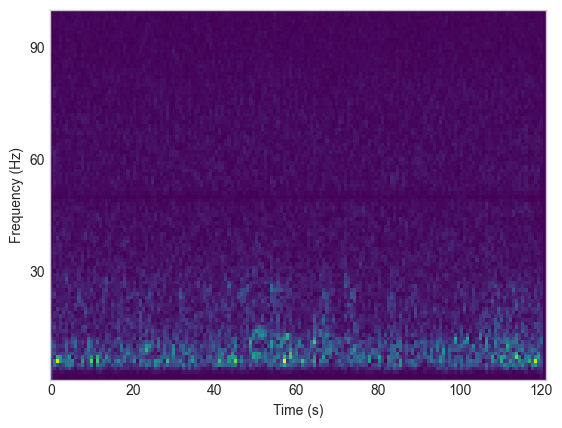

In [11]:
# sfreq 4000 Hz
fs = sfreq_4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_4000, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

In [34]:
Zxx.shape

(126, 161)

(0.0, 90.0)

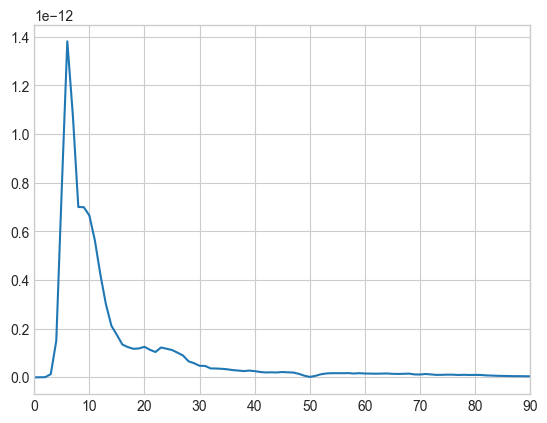

In [12]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

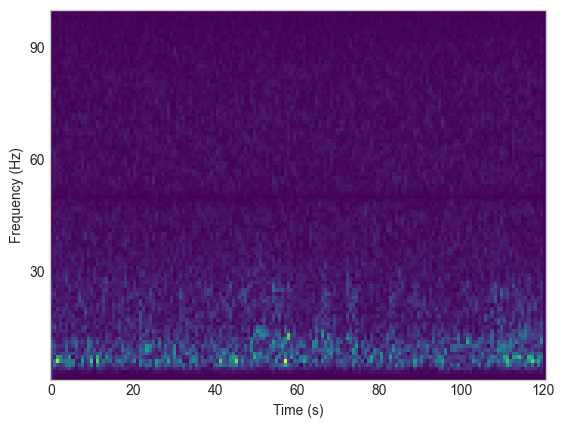

In [13]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_250, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

In [15]:
Zxx.shape

(126, 161)

(0.0, 90.0)

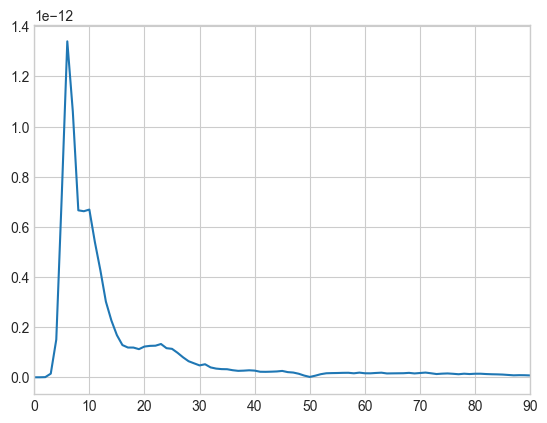

In [14]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

### Plot time frequency plots of all 250 Hz resampled channels:
- Identify and clean movement artefacts


Plot all time frequency plots


In [33]:
plot_time_frequency = externalized.fourier_transform_time_frequency_plots()

Clean all artefacts, plot new clean time frequency plots and save a new pickle file
- externalized_preprocessed_data_artefact_free.pickle

In [125]:
artefact_free_lfp = externalized.clean_artefacts()

In [126]:
artefact_free_lfp = load_data.load_externalized_pickle(filename="externalized_preprocessed_data_artefact_free")

In [128]:
artefact_free_lfp.head()

,BIDS_id,subject,hemisphere,subject_hemisphere,original_ch_name,contact,lfp_2_min,time_stamps,sfreq,sfreq_250Hz,lfp_resampled_250Hz,time_stamps_250Hz,filtered_lfp_4000Hz,filtered_lfp_250Hz,n_samples_250Hz
0,L001,025,Right,025_Right,LFP_R_01_STN_MT,0,"[0.004980505859375, 0.00499101611328125, 0.004...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.004981967630519316, 0.004993935731201689, 0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[-2.9618872254968376e-07, 7.872333751786832e-0...","[-7.59355112107618e-07, 9.768670360289528e-06,...",28751
1,L001,025,Right,025_Right,LFP_R_02_STN_MT,1A,"[0.04113792578125, 0.041147203125, 0.041153710...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.04113918003087577, 0.04115062690047614, 0.0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[-2.19025538731663e-06, -1.2608526729521691e-0...","[-5.4162502175678e-07, 8.516945973380159e-06, ...",28751
2,L001,025,Right,025_Right,LFP_R_03_STN_MT,1B,"[0.03457408203125, 0.034582628906249996, 0.034...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.03457557399192996, 0.03458711967239609, 0.0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[-7.314212306736417e-07, 3.055000770862241e-07...","[-7.327385311077718e-07, 8.641706900393375e-06...",28751
3,L001,025,Right,025_Right,LFP_R_04_STN_MT,1C,"[0.036031136718749995, 0.03603557421875, 0.036...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.036032965327211765, 0.03604643947045076, 0....","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[1.702683748518506e-07, 1.3902650470003246e-06...","[-6.7949441232911e-07, 1.0517844753306478e-05,...",28751
4,L001,025,Right,025_Right,LFP_R_05_STN_MT,2A,"[0.1043965625, 0.1044021015625, 0.104413085937...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.10439865455493076, 0.10441350059516627, 0.1...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[1.8502642472384863e-06, 3.191096217257872e-06...","[-5.950167616677922e-07, 1.1721655059859144e-0...",28751


from the raw signal cut out a segment with an artefact

In [35]:
sfreq_250 = preprocessed_data.sfreq_250Hz.values[1]
data_250 = preprocessed_data.filtered_lfp_250Hz.values[1]


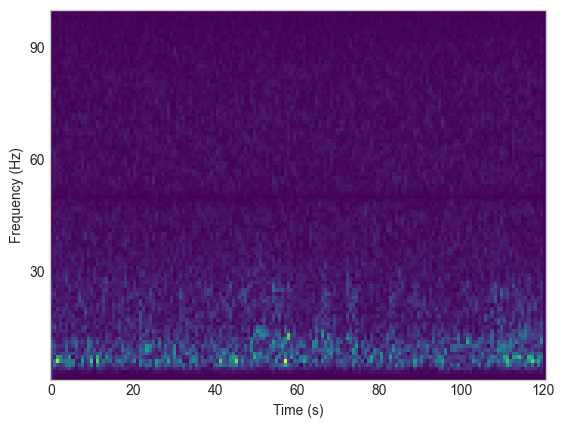

In [36]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_250, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

Cut out 50 - 62 s


In [49]:
# data_250.shape # 30000 samples, 250 samples/s, 120 sec
# X = 250 * input sec
# sec 50 - 62 = samples 
# 12.500 sample = 250 * 50 sec
# 15.500 sample = 250 * 62 sec

# data_250_clean_1 = data_250[0: 50sec+1]
# data_250_clean_2 = data_250[62sec:30000]

# clean_data = np.concatenate([data_250_clean_1, data_250_clean_2])
fs = sfreq_250
artefact_start = 50
artefact_stop = 62

sample_start = int(fs * artefact_start)
sample_stop = int(fs * artefact_stop)

data_clean_1 = data_250[0:sample_start+1]
data_clean_2 = data_250[sample_stop:30000]

clean_data = np.concatenate([data_clean_1, data_clean_2])

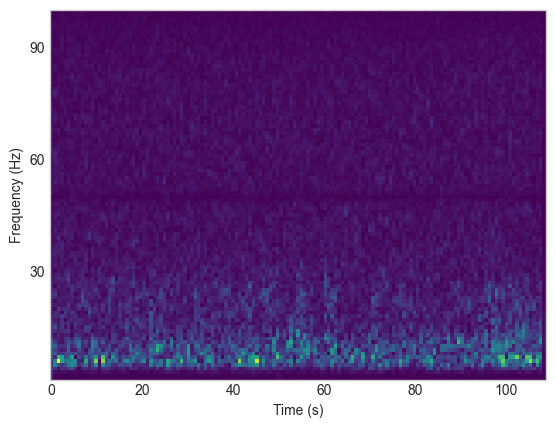

In [50]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(clean_data, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

Load the MNE objects of the cropped 2 min LFP recordings

In [114]:
mne_objects = load_data.load_externalized_pickle(filename="mne_objects_cropped_2_min")
mne_objects

{'25_original_2min': <RawBrainVision | sub-L001_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '30_original_2min': <RawBrainVision | sub-EL007_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '32_original_2min': <RawBrainVision | sub-L003_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '47_original_2min': <RawBrainVision | sub-L007_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '52_original_2min': <RawBrainVision | sub-EL014_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '59_original_2min': <RawBrainVision | sub-EL016_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopaPre_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '61_original_2min': <RawBrainVision | sub-L010_ses-LfpMedOffDy

Effective window size : 0.512 (s)
Need more than one channel to make topography for dbs. Disabling interactivity.


/var/folders/8d/3m_ljz890_j62q7hb7mpzdc40000gn/T/ipykernel_87578/1630132626.py:4: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  spectrum.plot(picks="LFP_R_02_STN_MT")
/var/folders/8d/3m_ljz890_j62q7hb7mpzdc40000gn/T/ipykernel_87578/1630132626.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  spectrum.plot(picks="LFP_R_02_STN_MT")
/Users/jenniferbehnke/anaconda3/envs/bssu/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


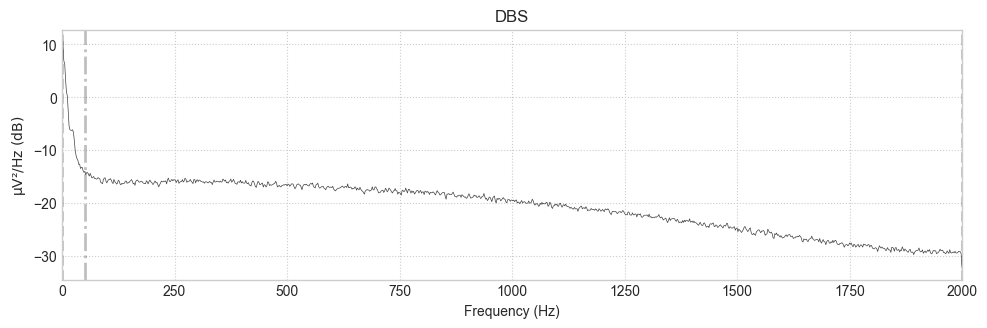

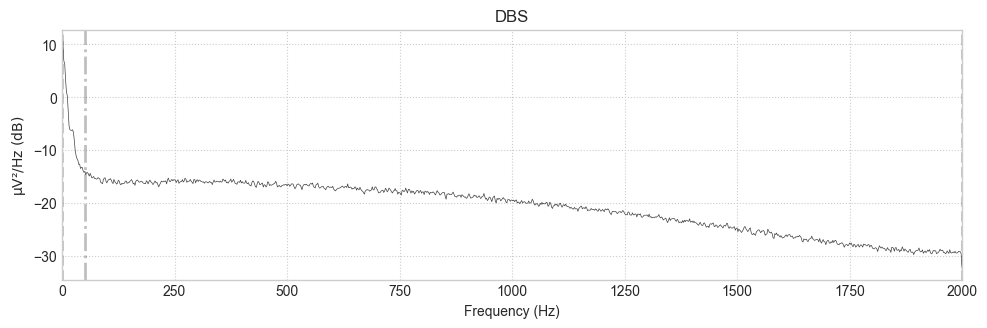

In [115]:
raw = mne_objects["25_original_2min"]
# raw.plot()
spectrum = raw.compute_psd()
spectrum.plot(picks="LFP_R_02_STN_MT")

In [ ]:
# downsample to 4000 Hz and to 250 Hz

Plot the raw signals and filter line noise

In [218]:
# get an example original cropped signal
sub025_1A = preprocessed_data.lfp_2_min.values[1]
sub025_timestamps = preprocessed_data.time_stamps.values[1]
sub025_1A

array([0.04113793, 0.0411472 , 0.04115371, ..., 0.04123406, 0.04123497,
       0.04123966])

In [219]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap
notch_freq = 50 # 50 Hz line noise in Europe
Q = 30 # Q factor for notch filter

# apply notch filter
b, a = scipy.signal.iirnotch(w0=notch_freq, Q=Q, fs=fs)
filtered_signal = scipy.signal.filtfilt(b, a, sub025_1A)


In [266]:
# set filter parameters for band-pass filter
filter_order = 3 # in MATLAB spm_eeg_filter default=5 Butterworth
frequency_cutoff_low = 5 # 5Hz high-pass filter 
frequency_cutoff_high = 95 # 95 Hz low-pass filter
fs = 4000

# create the filter
b, a = scipy.signal.butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=fs)
band_pass_filtered = scipy.signal.filtfilt(b, a, filtered_signal) 

In [267]:
band_pass_filtered # ????

array([-2.19025539e-06, -1.26085267e-06, -3.37861237e-07, ...,
       -4.70026647e-06, -4.27250518e-06, -3.84178522e-06])

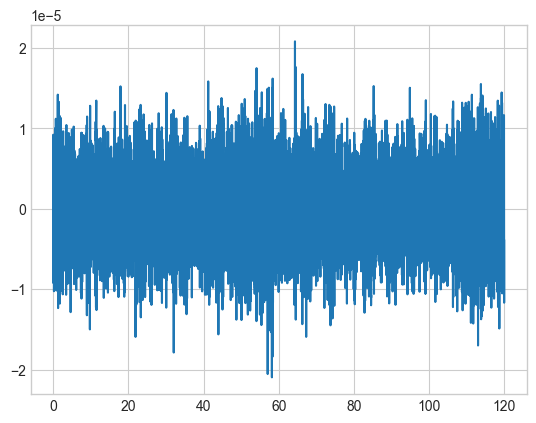

In [268]:
fig, axes = plt.subplots(1, 1)

#axes.set_ylim(0.041, 0.0414)
axes.plot(sub025_timestamps, band_pass_filtered)



plt.show()


Option 1:

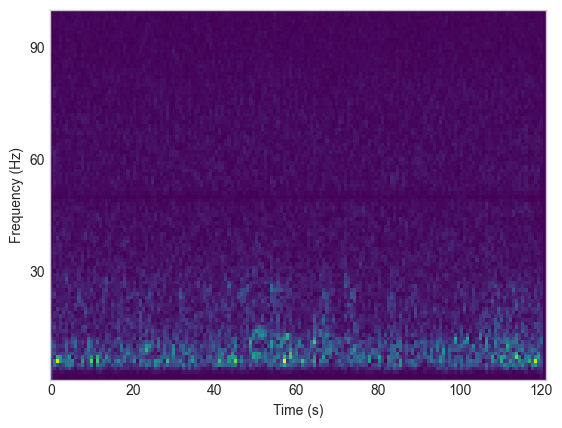

In [300]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

frequencies, times, Zxx = signal.stft(band_pass_filtered, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))

axs.set_xlabel('Time (s)')

axs.set_ylabel('Frequency (Hz)')

#plt.colorbar(label='Amplitude (dB)')

axs.set_ylim(1, 100)



plt.show()

In [227]:
times.shape

(162,)

In [228]:
frequencies.shape

(2001,)

In [229]:
Zxx.shape

(2001, 162)

(0.0, 90.0)

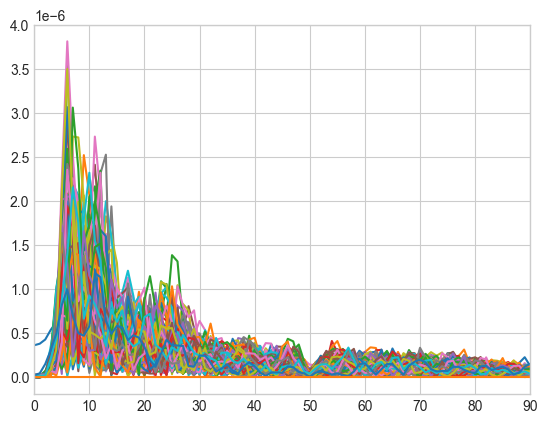

In [270]:
plt.plot(np.abs(Zxx)) # squared magnitude
plt.xlim([0, 90])

(0.0, 90.0)

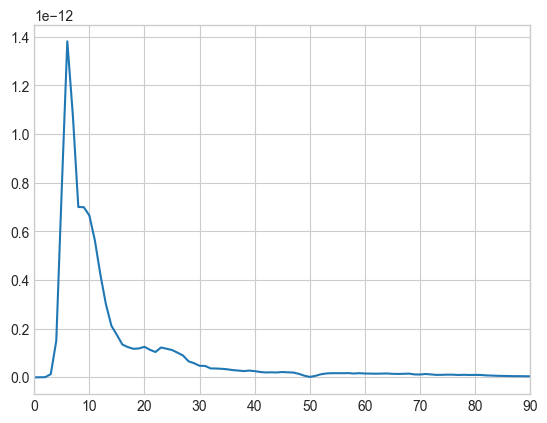

In [281]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

Option 2:

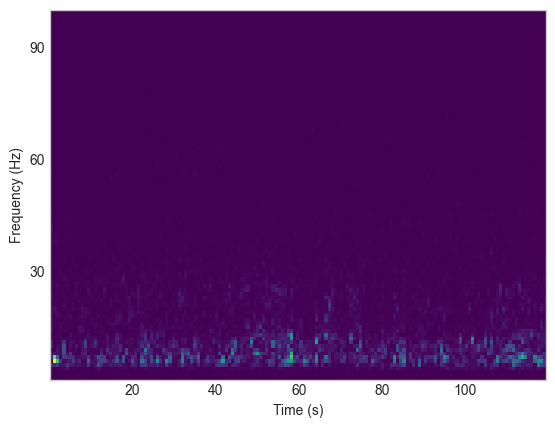

In [277]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hann window
window = hann(window_length, sym=False)

# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
frequencies, times, Zxx = scipy.signal.spectrogram(band_pass_filtered, fs=fs, window=window, noverlap=overlap, scaling="density", mode="psd", axis=0)
# this function computes the PSD directly

# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)


axs.pcolormesh(times, frequencies, Zxx, shading='auto', cmap='viridis') # -1, +1, zscore over time
# axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis')


axs.set_yticks(np.arange(0, 512, 30))

axs.set_xlabel('Time (s)')

axs.set_ylabel('Frequency (Hz)')

#plt.colorbar(label='Amplitude (dB)')

axs.set_ylim(1, 100)



plt.show()

In [273]:
Zxx

array([[6.46437401e-16, 2.47326886e-16, 1.09113187e-14, ...,
        1.92294502e-16, 1.43206127e-14, 3.27999118e-14],
       [3.25200309e-16, 2.15256974e-19, 4.81071753e-15, ...,
        1.45814374e-16, 6.13961036e-15, 1.46834501e-14],
       [2.86530071e-15, 1.31610115e-15, 2.66859833e-15, ...,
        6.12193309e-16, 3.60726584e-16, 2.30462251e-15],
       ...,
       [1.59000218e-33, 9.85202316e-35, 1.07194008e-34, ...,
        3.07551176e-36, 7.40492531e-35, 2.66352586e-35],
       [1.58965926e-33, 9.83595448e-35, 1.06792233e-34, ...,
        3.07521154e-36, 7.36135361e-35, 2.65496914e-35],
       [7.94771229e-34, 4.91525705e-35, 5.33298133e-35, ...,
        1.53749507e-36, 3.67341237e-35, 1.32605094e-35]])

(0.0, 90.0)

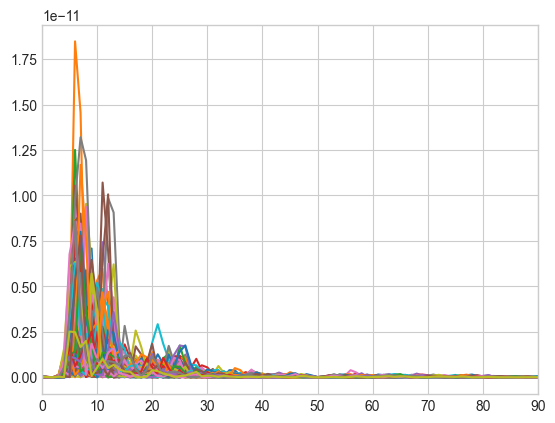

In [274]:
plt.plot(Zxx)
plt.xlim([0, 90])

(0.0, 90.0)

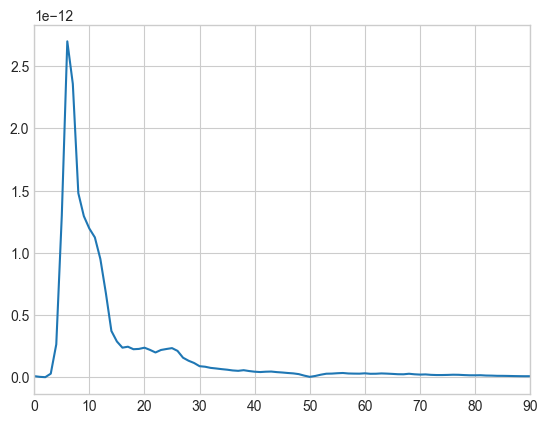

In [278]:
# average PSD across duration of the recording
average_Zxx = np.mean(Zxx, axis=1)

plt.plot(frequencies, average_Zxx)
plt.xlim([0, 90])

In [276]:
# FILTER: NOTCH and LOW, HIGH PASS
# sample frequency: 250 Hz
fs = preprocessed_data.resampled_sfreq.values[1]

# set filter parameters for band-pass filter
filter_order = 5 # in MATLAB spm_eeg_filter default=5 Butterworth
frequency_cutoff_low = 5 # 5Hz high-pass filter
frequency_cutoff_high = 95 # 95 Hz low-pass filter

# create the filter
b, a = scipy.signal.butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=fs)


AttributeError: 'DataFrame' object has no attribute 'resampled_sfreq'

In [15]:
band_pass_filtered = scipy.signal.filtfilt(b, a, sub025_1A_resampled)

(array([[9.61530952e-12, 1.88501627e-11, 1.50461859e-11, ...,
         5.43574363e-12, 2.46486404e-14, 1.62972950e-12],
        [1.07909555e-11, 1.39377777e-11, 5.53914223e-12, ...,
         1.09332718e-11, 1.58342623e-12, 2.29883960e-11],
        [2.35033062e-14, 5.46499555e-14, 1.59073379e-12, ...,
         4.29067698e-12, 2.05497331e-12, 2.29038520e-12],
        ...,
        [2.16931534e-26, 1.41231330e-27, 4.02565590e-27, ...,
         2.62602663e-27, 4.69393115e-27, 1.12384189e-26],
        [1.68908213e-26, 1.11465326e-27, 4.12497041e-27, ...,
         1.05032923e-27, 2.11868874e-27, 1.08820083e-26],
        [7.64576358e-27, 5.08755106e-28, 2.07979787e-27, ...,
         2.62878180e-28, 6.31026026e-28, 5.38235710e-27]]),
 array([  0.       ,   0.9765625,   1.953125 ,   2.9296875,   3.90625  ,
          4.8828125,   5.859375 ,   6.8359375,   7.8125   ,   8.7890625,
          9.765625 ,  10.7421875,  11.71875  ,  12.6953125,  13.671875 ,
         14.6484375,  15.625    ,  16.6015625,

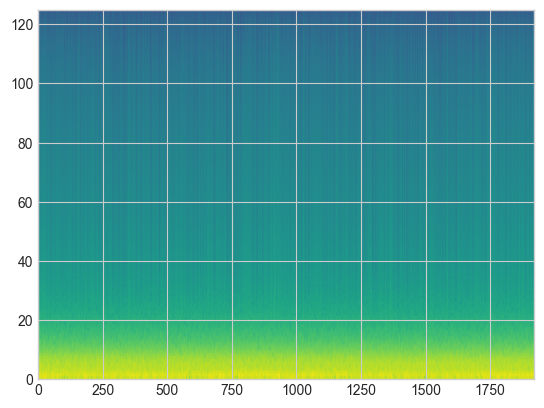

In [71]:
plt.specgram(
    x=band_pass_filtered,
    Fs=250,
    noverlap=0,
    cmap="viridis"
    )